In [73]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import os
import sys
from pathlib import Path
import pandas as pd

In [74]:
def load_csv_from_project_root(relative_path: str, project_root: str = r'C:/Users/kau75421/LLMprojects/Fraudetector/bank_model_project') -> pd.DataFrame:
    """
    Load a CSV file using a path relative to the project root.

    Parameters:
    - relative_path: str, relative path to the CSV file from the project root
    - project_root: str, full path to the project root directory

    Returns:
    - pd.DataFrame: Loaded DataFrame
    """
    root = Path(project_root)
    csv_path = root / relative_path
    return pd.read_csv(csv_path)

# Example usage:
df = load_csv_from_project_root('data/raw/Bank_Transaction_Fraud_Detection.csv')
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [75]:
df.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email'],
      dtype='object')

In [76]:
# is fraud data distribution stats
fraud_distribution = df['Is_Fraud'].value_counts()
print("Fraud Distribution (Counts):")
print(fraud_distribution)

print("\nFraud Distribution (Percentage):")
fraud_percentage = df['Is_Fraud'].value_counts(normalize=True) * 100
print(fraud_percentage)


Fraud Distribution (Counts):
Is_Fraud
0    189912
1     10088
Name: count, dtype: int64

Fraud Distribution (Percentage):
Is_Fraud
0    94.956
1     5.044
Name: proportion, dtype: float64


C:\Users\kau75421\AppData\Local\Temp\ipykernel_22856\2252619852.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_percentage.index, y=fraud_percentage.values, palette='Set2')


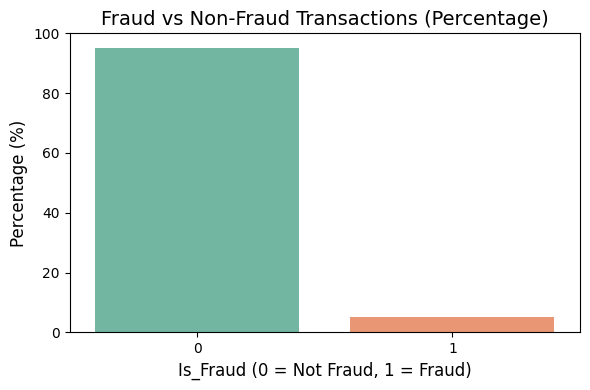

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentage distribution
fraud_percentage = df['Is_Fraud'].value_counts(normalize=True) * 100
fraud_percentage = fraud_percentage.sort_index()  # Ensure 0 and 1 are in order

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_percentage.index, y=fraud_percentage.values, palette='Set2')

# Labels
plt.title('Fraud vs Non-Fraud Transactions (Percentage)', fontsize=14)
plt.xlabel('Is_Fraud (0 = Not Fraud, 1 = Fraud)', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 100)  # Optional: ensure y-axis is in percent scale
plt.tight_layout()
plt.show()


In [79]:
df.columns

Index(['Gender', 'Age', 'State', 'City', 'Bank_Branch', 'Account_Type',
       'Transaction_Date', 'Transaction_Time', 'Transaction_Amount',
       'Merchant_ID', 'Transaction_Type', 'Merchant_Category',
       'Account_Balance', 'Transaction_Device', 'Transaction_Location',
       'Device_Type', 'Is_Fraud', 'Transaction_Currency',
       'Transaction_Description'],
      dtype='object')

In [80]:
print(df['Transaction_Description'].value_counts())

Transaction_Description
Sports ticket                1268
Home appliance repair        1257
Taxi fare                    1248
Seminar registration         1246
Taxi booking                 1240
                             ... 
Food subscription            1098
Loyalty points redemption    1093
Penalty fee                  1092
Online subscription          1080
Medical treatment payment    1071
Name: count, Length: 172, dtype: int64


In [81]:
#EDA use cases 
df.columns

Index(['Gender', 'Age', 'State', 'City', 'Bank_Branch', 'Account_Type',
       'Transaction_Date', 'Transaction_Time', 'Transaction_Amount',
       'Merchant_ID', 'Transaction_Type', 'Merchant_Category',
       'Account_Balance', 'Transaction_Device', 'Transaction_Location',
       'Device_Type', 'Is_Fraud', 'Transaction_Currency',
       'Transaction_Description'],
      dtype='object')

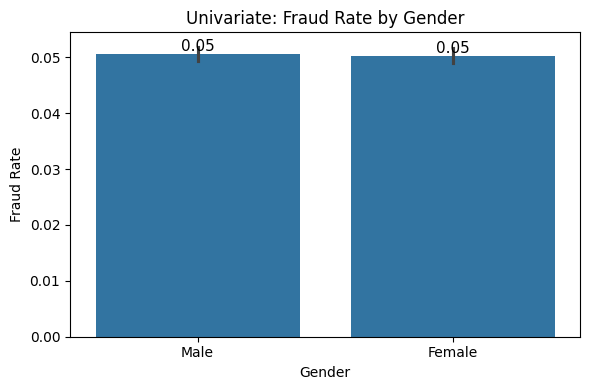

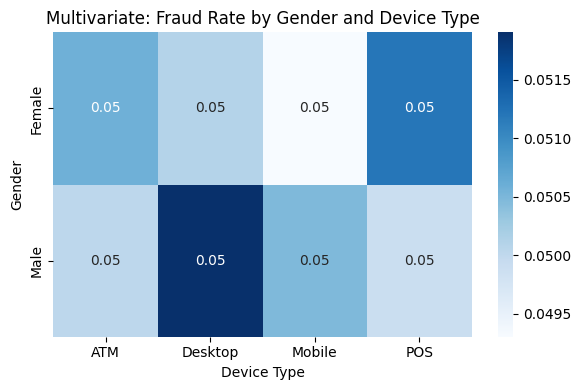

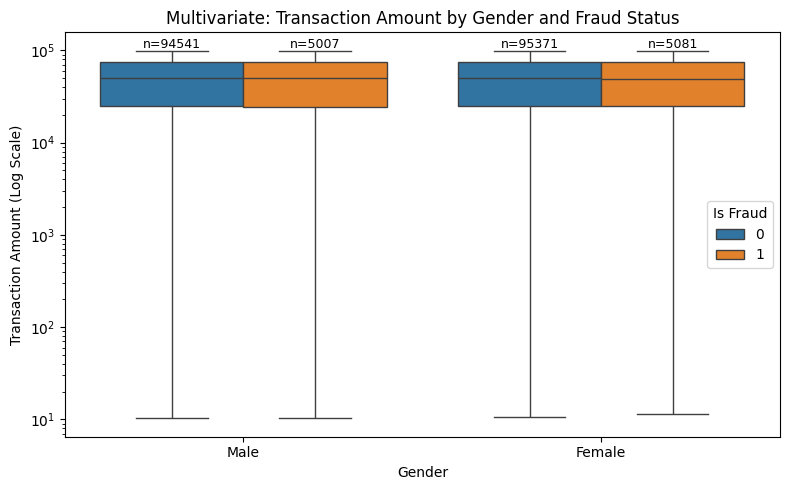

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Univariate Use Case — Fraud Rate by Gender with annotations
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=df, x='Gender', y='Is_Fraud', estimator=np.mean)
plt.title('Univariate: Fraud Rate by Gender')
plt.ylabel('Fraud Rate')
plt.xlabel('Gender')

# Add annotations on top of bars
for p in ax.patches:
    value = f"{p.get_height():.2f}"
    ax.annotate(value, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black')

plt.tight_layout()
plt.show()

# Step 3: Multivariate Use Case — Heatmap with annotation
gender_device_fraud = df.pivot_table(index='Gender', columns='Device_Type', values='Is_Fraud', aggfunc='mean')
plt.figure(figsize=(6, 4))
sns.heatmap(gender_device_fraud, annot=True, fmt=".2f", cmap='Blues')
plt.title('Multivariate: Fraud Rate by Gender and Device Type')
plt.ylabel('Gender')
plt.xlabel('Device Type')
plt.tight_layout()
plt.show()

# Step 4: Multivariate Use Case — Boxplot of Transaction Amount with counts
plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df, x='Gender', y='Transaction_Amount', hue='Is_Fraud')
plt.title('Multivariate: Transaction Amount by Gender and Fraud Status')
plt.ylabel('Transaction Amount (Log Scale)')
plt.xlabel('Gender')
plt.yscale('log')
plt.legend(title='Is Fraud')

# Add count annotations above each box
grouped = df.groupby(['Gender', 'Is_Fraud']).size().reset_index(name='count')
for i, (gender, is_fraud, count) in enumerate(zip(grouped['Gender'], grouped['Is_Fraud'], grouped['count'])):
    xpos = i // 2 + 0.2 * (1 if is_fraud else -1)
    ypos = df[(df['Gender'] == gender) & (df['Is_Fraud'] == is_fraud)]['Transaction_Amount'].max()
    plt.text(xpos, ypos, f'n={count}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


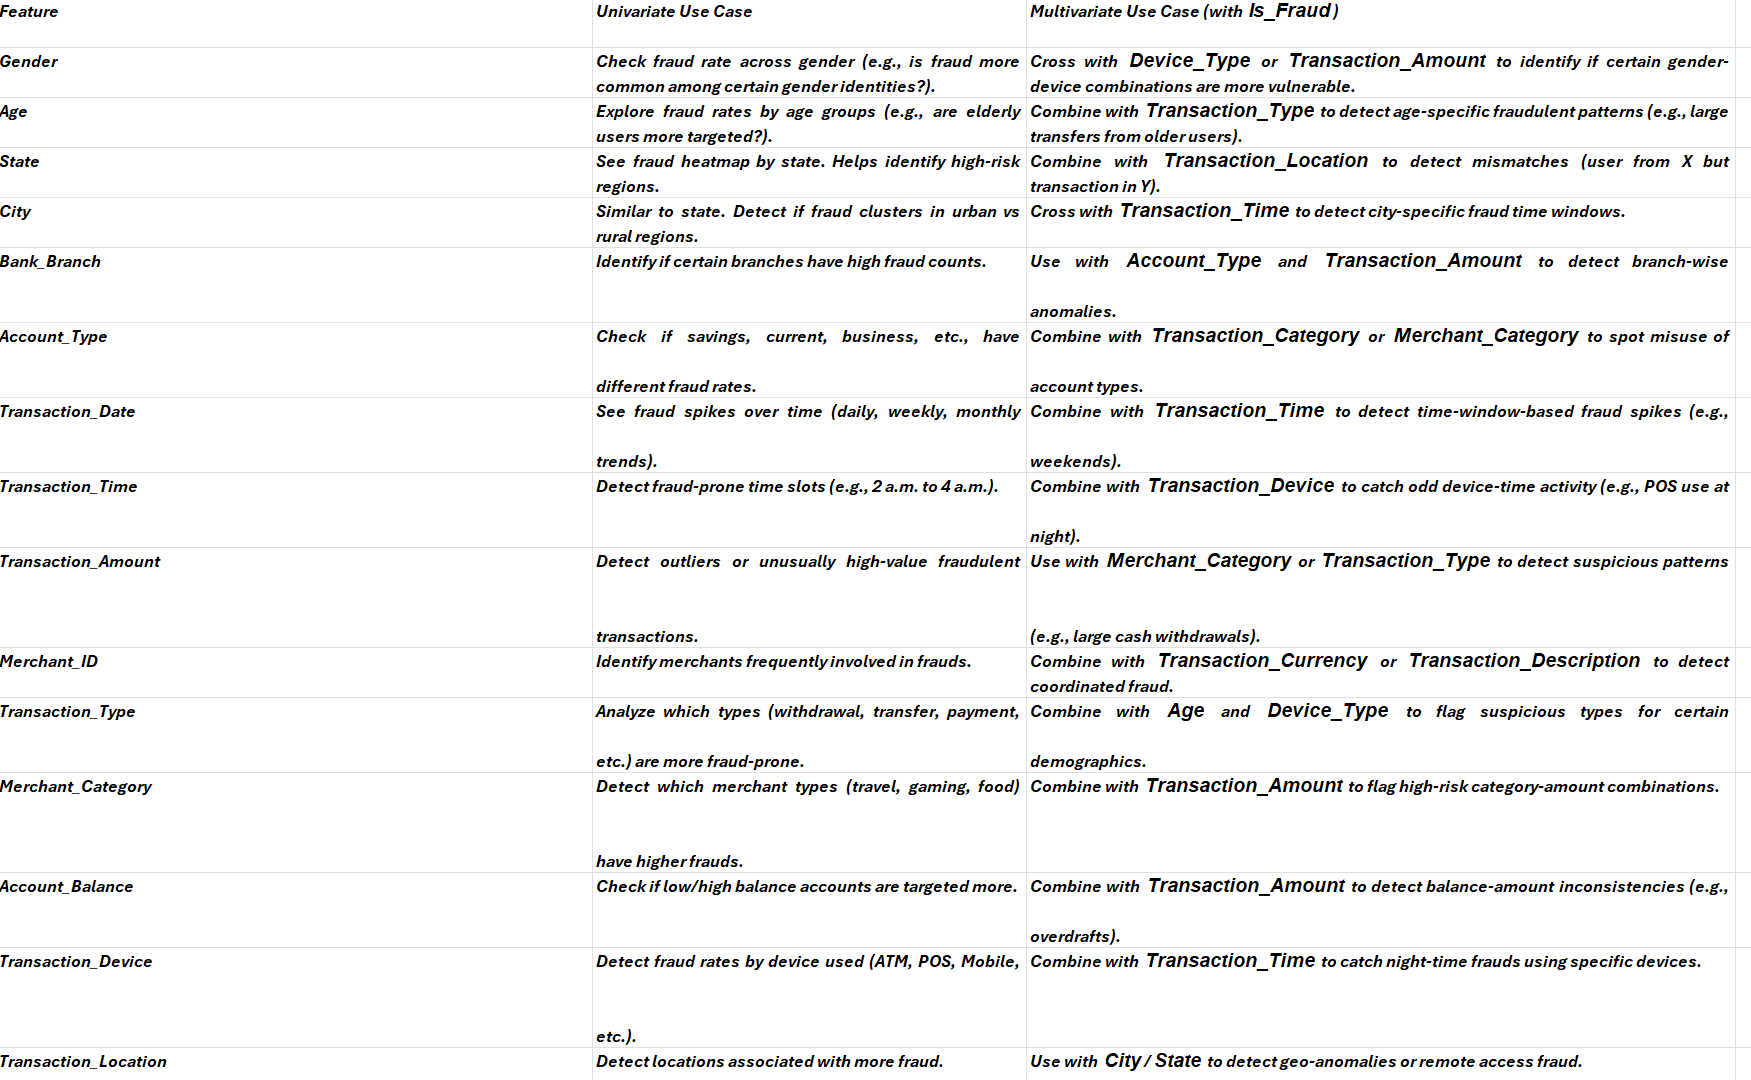

In [91]:
from IPython.display import Image
Image(r"C:\Users\kau75421\LLMprojects\Fraudetector\Eda_usecases.png", width=800, height=400)

   Gender  Is_Fraud
0  Female  0.050297
1    Male  0.050581
  Age_Group  Is_Fraud
0       <18       NaN
1     18-34  0.050357
2     35-49  0.050627
3     50-64  0.051334
4       65+  0.047976


C:\Users\kau75421\AppData\Local\Temp\ipykernel_22856\2436284180.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_fraud_rate = df.groupby('Age_Group')['Is_Fraud'].mean().reset_index()


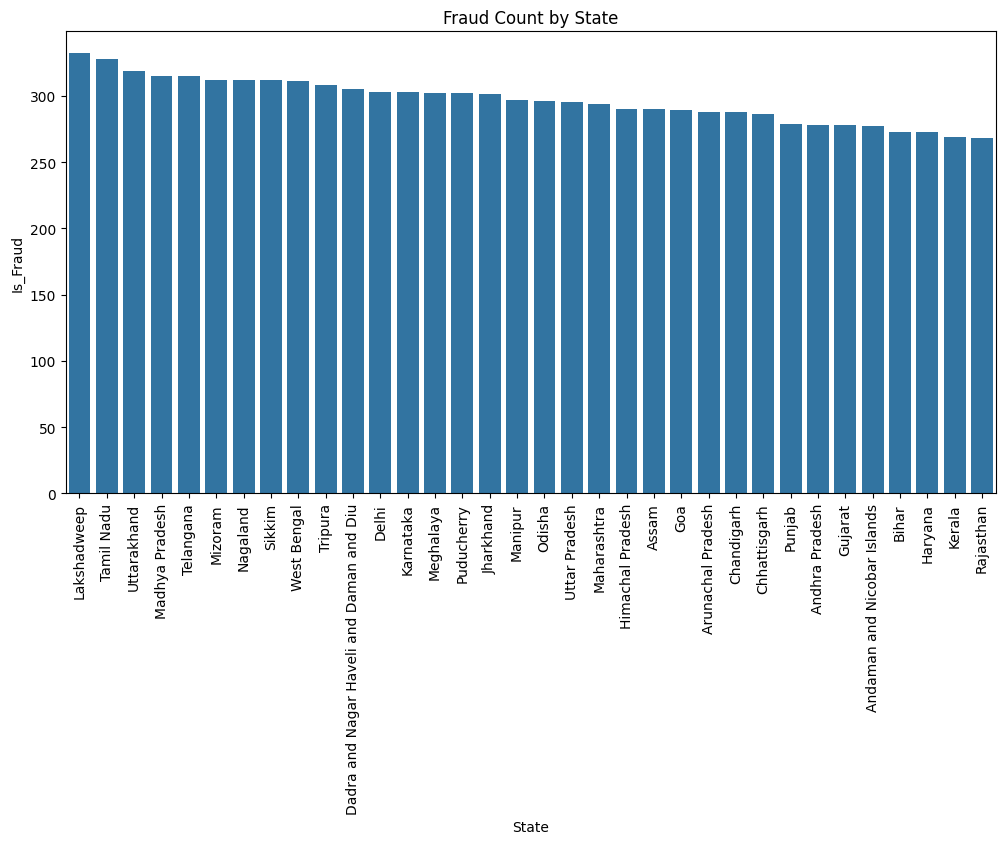

No 'Region_Type' column available to analyze Urban vs Rural fraud rates.
            Bank_Branch  Is_Fraud
21    Chandigarh Branch       390
68     Kavaratti Branch       332
133      Udaipur Branch       144
123     Silvassa Branch       108
26         Daman Branch       101
109   Port Blair Branch        99
19   Car Nicobar Branch        97
60     Jorethang Branch        96
33           Diu Branch        96
90    Mokokchung Branch        90
  Account_Type  Is_Fraud
0     Business  0.051682
1     Checking  0.049354
2      Savings  0.050291


C:\Users\kau75421\AppData\Local\Temp\ipykernel_22856\2436284180.py:54: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])


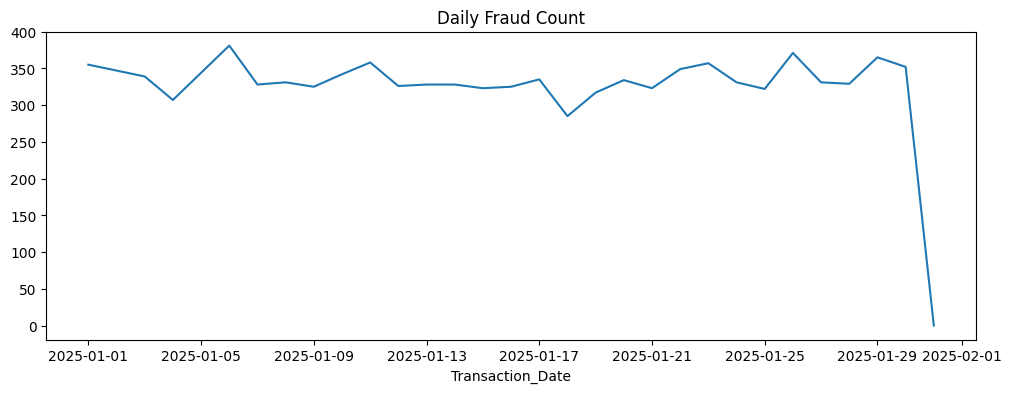

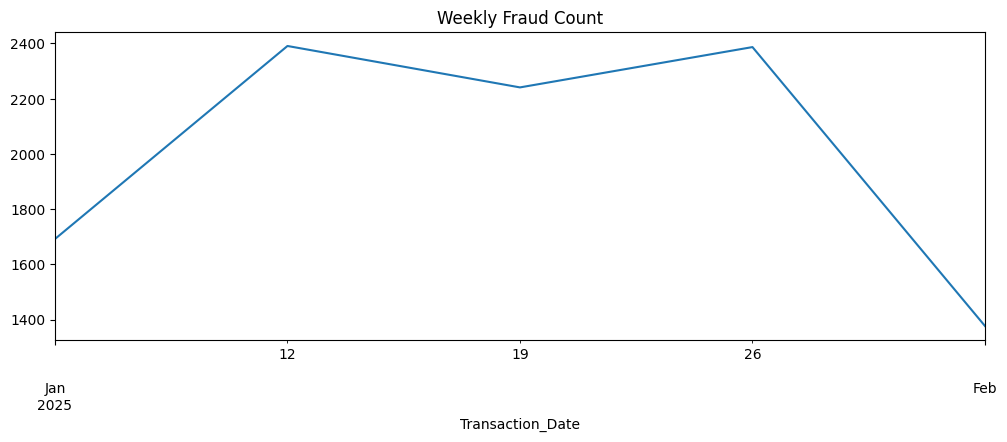

C:\Users\kau75421\AppData\Local\Temp\ipykernel_22856\2436284180.py:65: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Transaction_Hour'] = pd.to_datetime(df['Transaction_Time'], errors='coerce').dt.hour


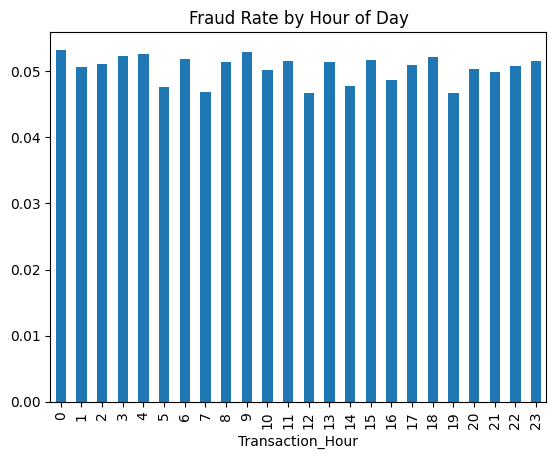

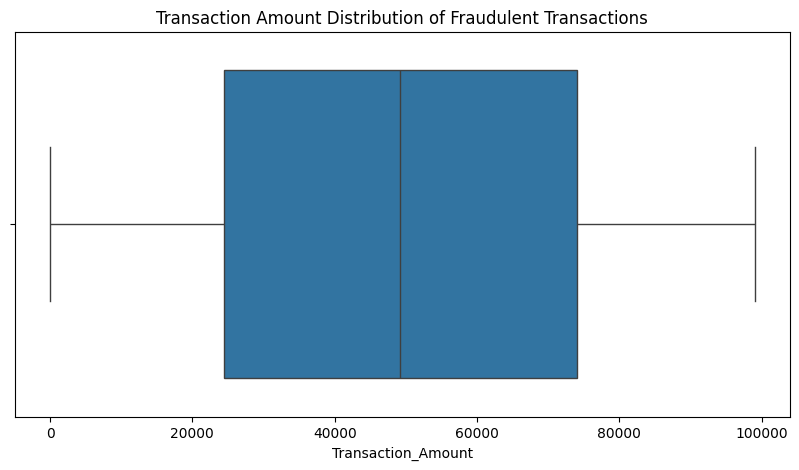

                                Merchant_ID  Fraud_Count
10087  fffc5ab9-acbd-4937-8b65-688986ceaac5            1
0      000875cf-c11f-4e9e-9fee-f95d1a091bf0            1
1      000f554a-a45e-464a-91c1-e12fb294184c            1
2      0022e7f7-6a0e-4720-a4a6-2067c1df2b6c            1
3      0025144a-4305-42df-8db5-d9069f144ed3            1
4      002de020-d903-46b4-ad55-8b8ed80afd52            1
5      0030d5d2-2b91-4e24-a675-b05da8490f03            1
6      00349d18-b87d-4a78-915c-581a56dbc578            1
10071  ffbe640f-6e76-4159-bc73-cf21724dae31            1
10070  ffbd47f1-b8f0-4717-8e62-8cbfb0bebdff            1
  Transaction_Type  Is_Fraud
0     Bill Payment  0.049276
1           Credit  0.050971
2            Debit  0.050762
3         Transfer  0.051886
4       Withdrawal  0.049300
  Balance_Group  Is_Fraud
0           <1k       NaN
1         1k-5k       NaN
2        5k-10k  0.052716
3       10k-50k  0.050201
4          50k+  0.050403
              Transaction_Device  Is_Fraud


C:\Users\kau75421\AppData\Local\Temp\ipykernel_22856\2436284180.py:89: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_fraud_rate = df.groupby('Balance_Group')['Is_Fraud'].mean().reset_index()


In [84]:
# Fraud Analysis by Various Dimensions with Updated Column Names

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is loaded into df and has columns:
# 'Is_Fraud' (1 for fraud, 0 for non-fraud),
# 'Gender', 'Age', 'State', 'City', 'Bank_Branch',
# 'Account_Type', 'Transaction_Date', 'Transaction_Time',
# 'Transaction_Amount', 'Merchant_ID', 'Transaction_Type',
# 'Merchant_Category', 'Account_Balance', 'Transaction_Device',
# 'Transaction_Location', 'Device_Type', 'Transaction_Currency',
# 'Transaction_Description'

# 1. Fraud rate across Gender
gender_fraud_rate = df.groupby('Gender')['Is_Fraud'].mean().reset_index()
print(gender_fraud_rate)

# 2. Fraud rates by Age groups
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['<18', '18-34', '35-49', '50-64', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
age_fraud_rate = df.groupby('Age_Group')['Is_Fraud'].mean().reset_index()
print(age_fraud_rate)

# 3. Fraud heatmap by State
state_fraud_counts = df.groupby('State')['Is_Fraud'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=state_fraud_counts.sort_values('Is_Fraud', ascending=False), x='State', y='Is_Fraud')
plt.xticks(rotation=90)
plt.title('Fraud Count by State')
plt.show()

# 4. Fraud clusters Urban vs Rural
# Assuming you have a mapping of City to region type (urban/rural)
# For demo, let's assume a 'Region_Type' column exists or create one if available
# If not, you need external data to map City -> Urban/Rural
if 'Region_Type' in df.columns:
    region_fraud_rate = df.groupby('Region_Type')['Is_Fraud'].mean().reset_index()
    print(region_fraud_rate)
else:
    print("No 'Region_Type' column available to analyze Urban vs Rural fraud rates.")

# 5. Fraud counts by Bank Branch
branch_fraud_counts = df.groupby('Bank_Branch')['Is_Fraud'].sum().reset_index()
print(branch_fraud_counts.sort_values('Is_Fraud', ascending=False).head(10))

# 6. Fraud rate by Account Type
account_fraud_rate = df.groupby('Account_Type')['Is_Fraud'].mean().reset_index()
print(account_fraud_rate)

# 7. Fraud spikes over time (daily, weekly, monthly)
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
daily_fraud = df.groupby(df['Transaction_Date'].dt.date)['Is_Fraud'].sum()
weekly_fraud = df.groupby(df['Transaction_Date'].dt.to_period('W'))['Is_Fraud'].sum()
monthly_fraud = df.groupby(df['Transaction_Date'].dt.to_period('M'))['Is_Fraud'].sum()

daily_fraud.plot(title='Daily Fraud Count', figsize=(12,4))
plt.show()
weekly_fraud.plot(title='Weekly Fraud Count', figsize=(12,4))
plt.show()

# 8. Fraud-prone time slots (e.g., 2 a.m. to 4 a.m.)
df['Transaction_Hour'] = pd.to_datetime(df['Transaction_Time'], errors='coerce').dt.hour
hourly_fraud_rate = df.groupby('Transaction_Hour')['Is_Fraud'].mean()
hourly_fraud_rate.plot(kind='bar', title='Fraud Rate by Hour of Day')
plt.show()

# 9. Outliers or unusually high-value fraudulent transactions
fraudulent_transactions = df[df['Is_Fraud'] == 1]
plt.figure(figsize=(10,5))
sns.boxplot(x=fraudulent_transactions['Transaction_Amount'])
plt.title('Transaction Amount Distribution of Fraudulent Transactions')
plt.show()

# 10. Merchants frequently involved in frauds
merchant_fraud_counts = df[df['Is_Fraud'] == 1].groupby('Merchant_ID')['Is_Fraud'].count().reset_index(name='Fraud_Count')
print(merchant_fraud_counts.sort_values('Fraud_Count', ascending=False).head(10))

# 11. Fraud-prone transaction types
transaction_type_fraud_rate = df.groupby('Transaction_Type')['Is_Fraud'].mean().reset_index()
print(transaction_type_fraud_rate)

# 13. Fraud rates by Account Balance levels
balance_bins = [0, 1000, 5000, 10000, 50000, 1e10]
balance_labels = ['<1k', '1k-5k', '5k-10k', '10k-50k', '50k+']
df['Balance_Group'] = pd.cut(df['Account_Balance'], bins=balance_bins, labels=balance_labels, right=False)
balance_fraud_rate = df.groupby('Balance_Group')['Is_Fraud'].mean().reset_index()
print(balance_fraud_rate)

# 14. Fraud rates by Transaction Device
device_fraud_rate = df.groupby('Transaction_Device')['Is_Fraud'].mean().reset_index()
print(device_fraud_rate)

# 15. Locations with more fraud (using Transaction_Location)
location_fraud_counts = df.groupby('Transaction_Location')['Is_Fraud'].sum().reset_index()
print(location_fraud_counts.sort_values('Is_Fraud', ascending=False).head(10))

# 16. Univariate fraud concentration by Device_Type (Desktop, Mobile, Unknown)
device_type_fraud_rate = df.groupby('Device_Type')['Is_Fraud'].mean().reset_index()
print(device_type_fraud_rate)


(Age + Transaction_Amount + Is_Fraud)
→ Older user making high-value transfer: suspicious?

(Transaction_Currency + Merchant_ID + Is_Fraud)
→ Foreign currency at local merchants: potentially fraudulent?

(Transaction_Device + Transaction_Time + Is_Fraud)
→ Mobile device used for transfer at 3 a.m.: raise alert?

(Transaction_Description + Merchant_Category + Is_Fraud)

In [85]:
# #heatmap_data = df.pivot_table(index='Transaction_Time', columns='Transaction_Device', values='Is_Fraud', aggfunc='mean')

# plt.figure(figsize=(10, 5))
# sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlOrRd')
# plt.title('Fraud Rate by Time and Device')
# plt.xlabel('Device Type')
# plt.ylabel('Hour of Day')
# plt.tight_layout()
# plt.show()


In [86]:
# gift_travel = df[(df['Transaction_Description'] == 'gift') & (df['Merchant_Category'] == 'Travel')]
# fraud_rate = gift_travel['Is_Fraud'].mean()
# print(f"Fraud rate when description='gift' and merchant='Travel': {fraud_rate:.2%}")

# plt.figure(figsize=(5, 4))
# sns.countplot(data=gift_travel, x='Is_Fraud')
# plt.title("Fraud Count for 'gift' Description with Travel Merchant")
# plt.xlabel('Is Fraud')
# plt.ylabel('Count')
# plt.tight_layout()
# plt.show()


In [87]:
# gift_travel = df[(df['Transaction_Description'] == 'gift') & (df['Merchant_Category'] == 'Travel')]
# fraud_rate = gift_travel['Is_Fraud'].mean()
# print(f"Fraud rate when description='gift' and merchant='Travel': {fraud_rate:.2%}")

# plt.figure(figsize=(5, 4))
# sns.countplot(data=gift_travel, x='Is_Fraud')
# plt.title("Fraud Count for 'gift' Description with Travel Merchant")
# plt.xlabel('Is Fraud')
# plt.ylabel('Count')
# plt.tight_layout()
# plt.show()
